# Data Import + Cleaning

This Script concerns the import of Files as well as the File Preparation for Descriptive Analysis

Source of the too Data Files is Kaggle accesible at: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/data

**The Original Description of the Kaggle Description concerning Sources**

This dataset(s) contains 4 years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España. Weather data was purchased as part of a personal project from the Open Weather API for the 5 largest cities in Spain and made public here.

-Direct Quote from Kaggle-

**This is the first script of Data Pre-Processing including tasks such as:**
- merging datasets
- standardising column formats
- one-hot encoding

**Importing Libraries**

In [89]:
# Libraries Data Description / Preparation
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
import json
warnings.filterwarnings('ignore')


# Libraries Models PCA, SVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score,mean_absolute_error


**Main**

# Data Import and Merging

In [90]:
# Loading necessary Files <- your file path here
energy_df = pd.read_csv("C:/Users/visha/Documents/Spain Data Mining/energy_spain.csv")
weather_df = pd.read_csv("C:/Users/visha/Documents/Spain Data Mining/weather_spain.csv")

**Energy Data Frame**

The key variable here is **Total Load Actual** per Hour for a period of 4 years.

**Weather Data Frame**

Includes additional metrological dimensions per hour for a poriod of 4 years.

In [91]:
energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [92]:
energy_df['time'].duplicated().any()

False

In [93]:
energy_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [94]:
energy_df.shape

(35064, 29)

In [95]:
weather_df

dt_iso city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178396 rows x 17 columns]

In [96]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [97]:
weather_df.shape

(178396, 17)

In [98]:
weather_df['dt_iso'].duplicated().any()

True

In [99]:
weather_df.shape

(178396, 17)

In [100]:
weather_df.rename(columns={'dt_iso': 'time'}, inplace=True)

In [101]:
merged_df = pd.merge(energy_df,weather_df,on="time",how="left")

In [102]:
merged_df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 00:00:00+01:00               447.0   
2  2015-01-01 00:00:00+01:00               447.0   
3  2015-01-01 00:00:00+01:00               447.0   
4  2015-01-01 00:00:00+01:00               447.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 329.0                                 0.0   
2                                 329.0                                 0.0   
3                                 329.0                                 0.0   
4                                 329.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 4844.0                       4821.0                  162.0   
2                 4844.0                       4821.0                  162.0   
3                 4844.0                       4821.0                  162.0   
4                 4844.0                       4821.0                  162.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0  ...           1        62      0.0      0.0      0.0           0   
1  ...           1       309      0.0      0.0      0.0           0   
2  ...           0       226      0.0      0.0      0.0           0   
3  ...           7        58      0.0      0.0      0.0           0   
4  ...           1        21      0.0      0.0      0.0           0   

   weather_id  weather_main  weather_description  weather_icon  
0         800         clear         sky is clear           01n  
1         800         clear         sky is clear           01n  
2         800         clear         sky is clear            01  
3         800         clear         sky is clear           01n  
4         800         clear         sky is clear           01n  

[5 rows x 45 columns]

In [103]:
merged_df.shape

(178396, 45)

In [104]:
merged_df.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [105]:
print(f'Count of null values for each column: \n{merged_df.isnull().sum()}')

Count of null values for each column: 
time                                                0
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
generation hydro pumped storage aggregated     178396
generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                 

In [106]:
merged_df.shape

(178396, 45)

**Pre-Assumptions - not validated**
Currently the dataframe has:
- rows: 178.396
- columns: 57

- pressure, humidity, wind_speed, wind_deg, clouds_all, weather_id are currently int64 --> transform them to float for consistency

**Missing Data:**
- generation hydro pumped storage aggregated    missing values: 178396
- forecast wind offshore eday ahead    missing values: 178396
==> according to the dataset description these columns have no values --> eliminate the columns for the "proof of concept" since no information is stored

generation hydro pumped storage consumption        95
generation hydro run-of-river and poundage         95
generation hydro water reservoir                   90
generation marine                                  95
generation nuclear                                 85
generation other                                   90
generation other renewable                         90
generation solar                                   90
generation waste                                   95
generation wind offshore                           90
generation wind onshore                            90
generation biomass                                 95
generation fossil brown coal/lignite               90
generation fossil coal-derived gas                 90
generation fossil gas                              90
generation fossil hard coal                        90
generation fossil oil                              95
generation fossil oil shale                        90
generation fossil peat                             90
generation geothermal                              90
total load actual                                 180

**Strategy Handling Missing: Eliminate Data Objects or Attributes**

Why: Deleting all rows with missing values compromises the overall dataframe by less than 1%. According to the book "Introdution to Data Mining", this is an effective strategy when solely a very small proposition of data is missing (as it is here the case)

**Drop Columns:**
- Weather_description ==> Long description of current weather => drop for simplicity
- Weather_ID ==> is the ID from the Weather Dataset - can potentially be dropped
- Weather_Icon ==> can potentially be dropped, just an Icon
- Weather icon code for website ==> can be dropped
- total load forecast


**Key Columns:**
- time ==> the time variable for our forecasting (needs to be transformed into datetime)
- Target Variable: total load actual ==> Actual Electricy Demand which is the **Energy Consumption in Demand at a particular time**

**One Hot Encoding - columns which have categorical values:**
- City / weather main (categorical) ==> one-hot encoding needed
Hereby weather is the macro description, weather description is a bit more precise

One Hot Encoding: One Hot Encoding is needed to encode categorical data (data which cannot be ranked/ordered) into continous values (binary 1/0)

Other Columns are Features directly usable in dataframe

**Before going to descriptive analysis, data types will be unified and One-Hot Encoding performed**

In [107]:
# Convert all int values to float (consistency)
merged_df['pressure'] = merged_df['pressure'].astype(float)
merged_df['humidity'] = merged_df['humidity'].astype(float)
merged_df['wind_speed'] = merged_df['wind_speed'].astype(float)
merged_df['wind_deg'] = merged_df['wind_deg'].astype(float)
merged_df['clouds_all'] = merged_df['clouds_all'].astype(float)

merged_df['time'] = merged_df['time'].astype(str) # converts time column to string required for more transformation
merged_df['time'] = merged_df['time'].str.split('+').str[0] # this removes the +01:00 time zone value from all rows
merged_df['time'] = pd.to_datetime(merged_df['time'], format='%Y-%m-%d %H:%M:%S') # converts the time column into the time frame

In [108]:
# drop columns obvioiusly not needed
merged_df.drop(columns=['weather_id'], inplace=True)
merged_df.drop(columns=['weather_icon'], inplace=True)
merged_df.drop(columns=['weather_description'], inplace=True)

merged_df.drop(columns=['generation hydro pumped storage aggregated'], inplace=True)
merged_df.drop(columns=['forecast wind offshore eday ahead'], inplace=True)
merged_df.drop(columns=['total load forecast'], inplace=True)



In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 39 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   time                                         178396 non-null  datetime64[ns]
 1   generation biomass                           178301 non-null  float64       
 2   generation fossil brown coal/lignite         178306 non-null  float64       
 3   generation fossil coal-derived gas           178306 non-null  float64       
 4   generation fossil gas                        178306 non-null  float64       
 5   generation fossil hard coal                  178306 non-null  float64       
 6   generation fossil oil                        178301 non-null  float64       
 7   generation fossil oil shale                  178306 non-null  float64       
 8   generation fossil peat                       178306 non-null  fl

In [110]:
unique_values = merged_df['weather_main'].unique()
print(unique_values)

['clear' 'clouds' 'rain' 'snow' 'fog' 'mist' 'haze' 'dust' 'drizzle'
 'thunderstorm' 'smoke' 'squall']


In [111]:
unique_values = merged_df['city_name'].unique()
print(unique_values)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


<span style="color:red">Does One-Hot Encoding the Weather Categories makes sense??</span>

In [112]:
# One-Hot Encoding for Weather_main
one_hot_encoded = pd.get_dummies(merged_df['weather_main'], prefix = "weather_main")
df_encoded = pd.concat([merged_df, one_hot_encoded], axis=1)
df_encoded.drop(columns=['weather_main'], inplace=True)
merged_df = df_encoded
merged_df.columns
# One-Hot Encoding for City_name
one_hot_encoded = pd.get_dummies(merged_df['city_name'], prefix = "city_name")
df_encoded = pd.concat([merged_df, one_hot_encoded], axis=1)
df_encoded.drop(columns=['city_name'], inplace=True)
merged_df = df_encoded
merged_df.head()

time  generation biomass  generation fossil brown coal/lignite  \
0 2015-01-01               447.0                                 329.0   
1 2015-01-01               447.0                                 329.0   
2 2015-01-01               447.0                                 329.0   
3 2015-01-01               447.0                                 329.0   
4 2015-01-01               447.0                                 329.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 4844.0   
1                                 0.0                 4844.0   
2                                 0.0                 4844.0   
3                                 0.0                 4844.0   
4                                 0.0                 4844.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4821.0                  162.0   
2                       4821.0                  162.0   
3                       4821.0                  162.0   
4                       4821.0                  162.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  weather_main_rain  weather_main_smoke  weather_main_snow  \
0  ...              False               False              False   
1  ...              False               False              False   
2  ...              False               False              False   
3  ...              False               False              False   
4  ...              False               False              False   

   weather_main_squall  weather_main_thunderstorm  city_name_ Barcelona  \
0                False                      False                 False   
1                False                      False                 False   
2                False                      False                 False   
3                False                      False                  True   
4                False                      False                 False   

   city_name_Bilbao  city_name_Madrid  city_name_Seville  city_name_Valencia  
0             False             False              False                True  
1             False              True              False               False  
2              True             False              False               False  
3             False             False              False               False  
4             False             False               True               False  

[5 rows x 54 columns]

<span style="color:red">Does One-Hot Encoding the City Names makes sense??</span>

In [113]:
merged_df.duplicated().sum()

21

In [114]:
# Drop Null Values for rows
merged_df = merged_df.dropna()
print(f'Count of null values for each column: \n{merged_df.isnull().sum()}')

Count of null values for each column: 
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore      

In [115]:
merged_df['time'].is_unique

False

In [116]:
merged_df['time'].unique().size  # same as row count

35013

In [117]:
merged_df['time'].duplicated().any()

True

In [118]:
merged_df.head()
mergedDF = merged_df.copy()

#  Aggregation
Sometimes “less is more” and this is the case with aggregation, the combining of two or more objects into a single object.

The forecasting approach is medium to long term oriented (see task description) to reduce the overall amount of data we are working with.
"Sometimes “less is more” and this is the case with aggregation, the combining of two or more objects into a single object."


There are several motivations for aggregation:
1. the smaller data sets resulting from data reduction require less memory and processing time and allow the use of more resource intensive data mining algorithms further down the road.
2. aggregation can act as a change of scope or scale by providing a high-level view of the data instead of a low-level view which is desired for having a medium term forecasting for policy making


The team also acknowledges the drawbacks from too much aggregation which is:
1. the loss of interesting details (fine granual insights - e.g. which hour has the hightest consumption)
2. losing the actual performance of data by ironing out to many flaws.

Some Plotting of graphs will reveal how the data behaves according to hourly, daily, weekly, monthly, yearly level to determine how granual the data should be processes.

In [119]:
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df.set_index('time', inplace=True)

# Resample the data to different time frequencies
merged_df_daily = merged_df.resample('D').mean()  # Daily resampling
merged_df_weekly = merged_df.resample('W').mean()  # Weekly resampling
merged_df_monthly = merged_df.resample('M').mean()  # Monthly resampling


In [120]:
merged_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load actual',
       'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_3h', 'clouds_all', 'weather_main_clear', 'weather_main_clouds',
       'weather_main_drizzle'

## Exploring different levels of granularity

Lets look at the whole data first

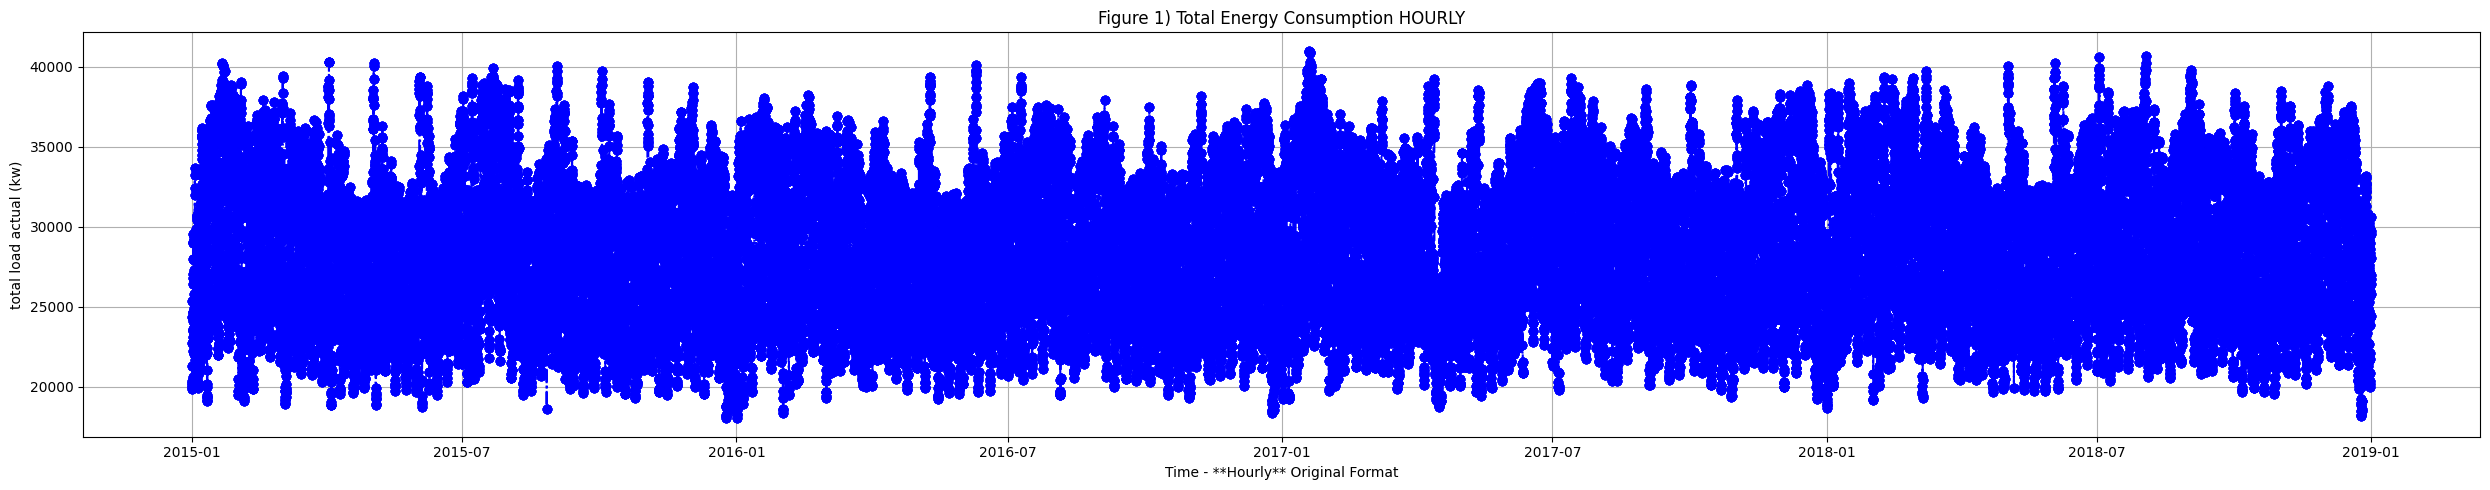

In [121]:
plt.figure(figsize=(25, 5))
plt.plot(merged_df.index, merged_df['total load actual'], color='blue', marker='o', linestyle='-.')
plt.xlabel('Time - **Hourly** Original Format')
plt.ylabel('total load actual (kw)')
plt.title('Figure 1) Total Energy Consumption HOURLY')
plt.grid(True)
plt.tight_layout()
plt.show()

Since here is a lot of noise in the dataset, we will examining the behaviour of data for different intervals and compare if the overall structure still prevails:
- daily
- weekly
- monthly
- yearly

In [122]:
merged_df["year"] = merged_df.index.year
merged_df["month"] = merged_df.index.month
merged_df["day"] = merged_df.index.day

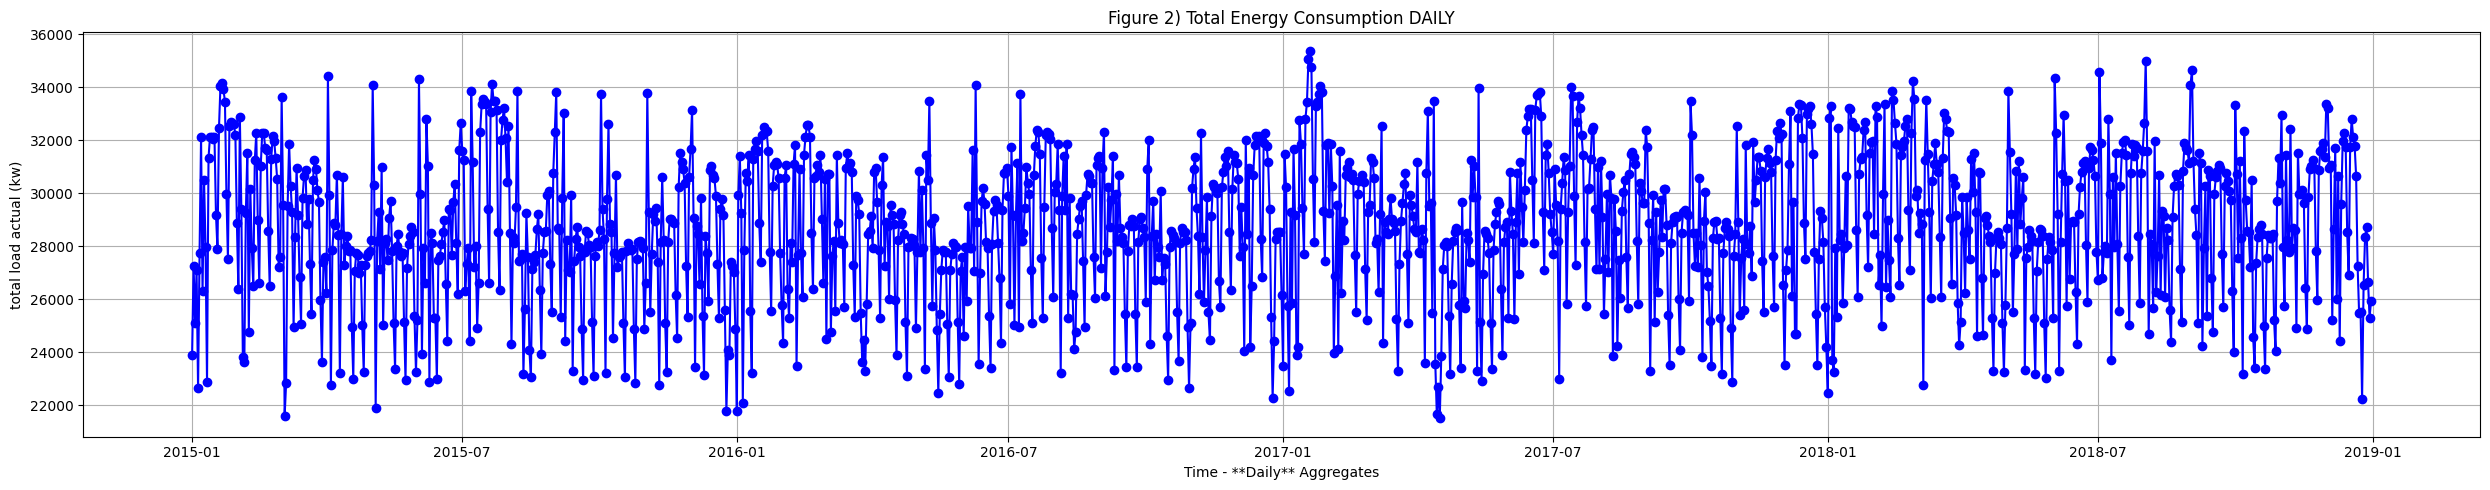

In [123]:
# Plot daily data
plt.figure(figsize=(25, 5))
plt.plot(merged_df_daily.index, merged_df_daily['total load actual'], color='blue', marker='o', linestyle='-')
plt.xlabel('Time - **Daily** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 2) Total Energy Consumption DAILY')
plt.grid(True)
plt.tight_layout()
plt.show()

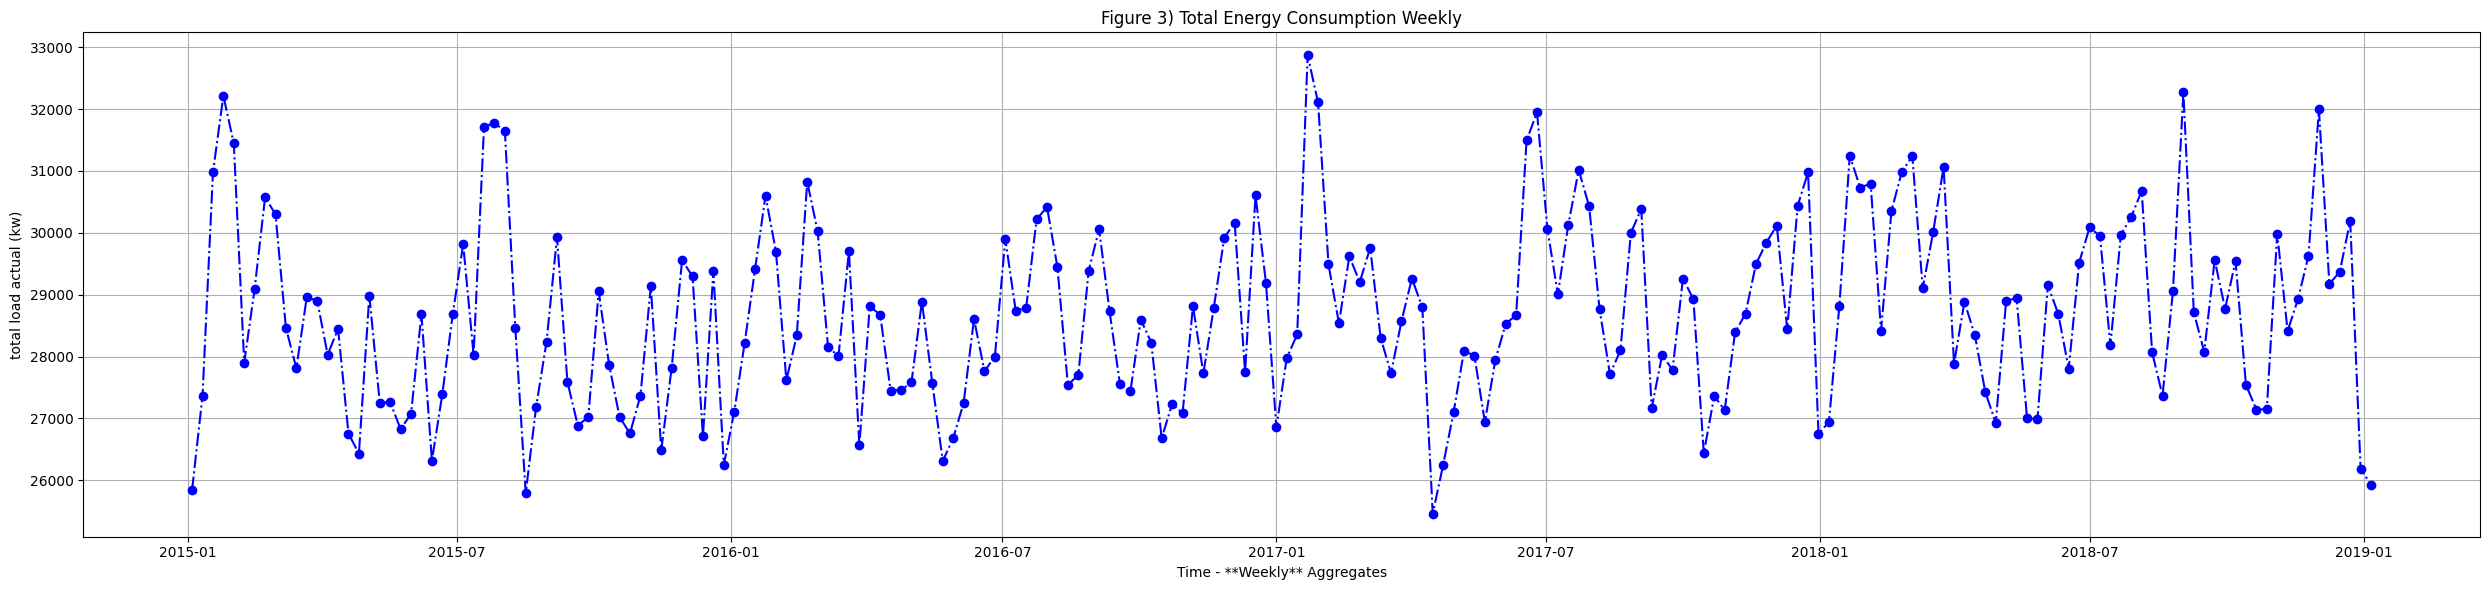

In [124]:
# Plot weekly data
plt.figure(figsize=(25, 6))
plt.plot(merged_df_weekly.index, merged_df_weekly['total load actual'], color='blue', marker='o', linestyle='-.')
plt.xlabel('Time - **Weekly** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 3) Total Energy Consumption Weekly')
plt.grid(True)
plt.tight_layout()
plt.show()

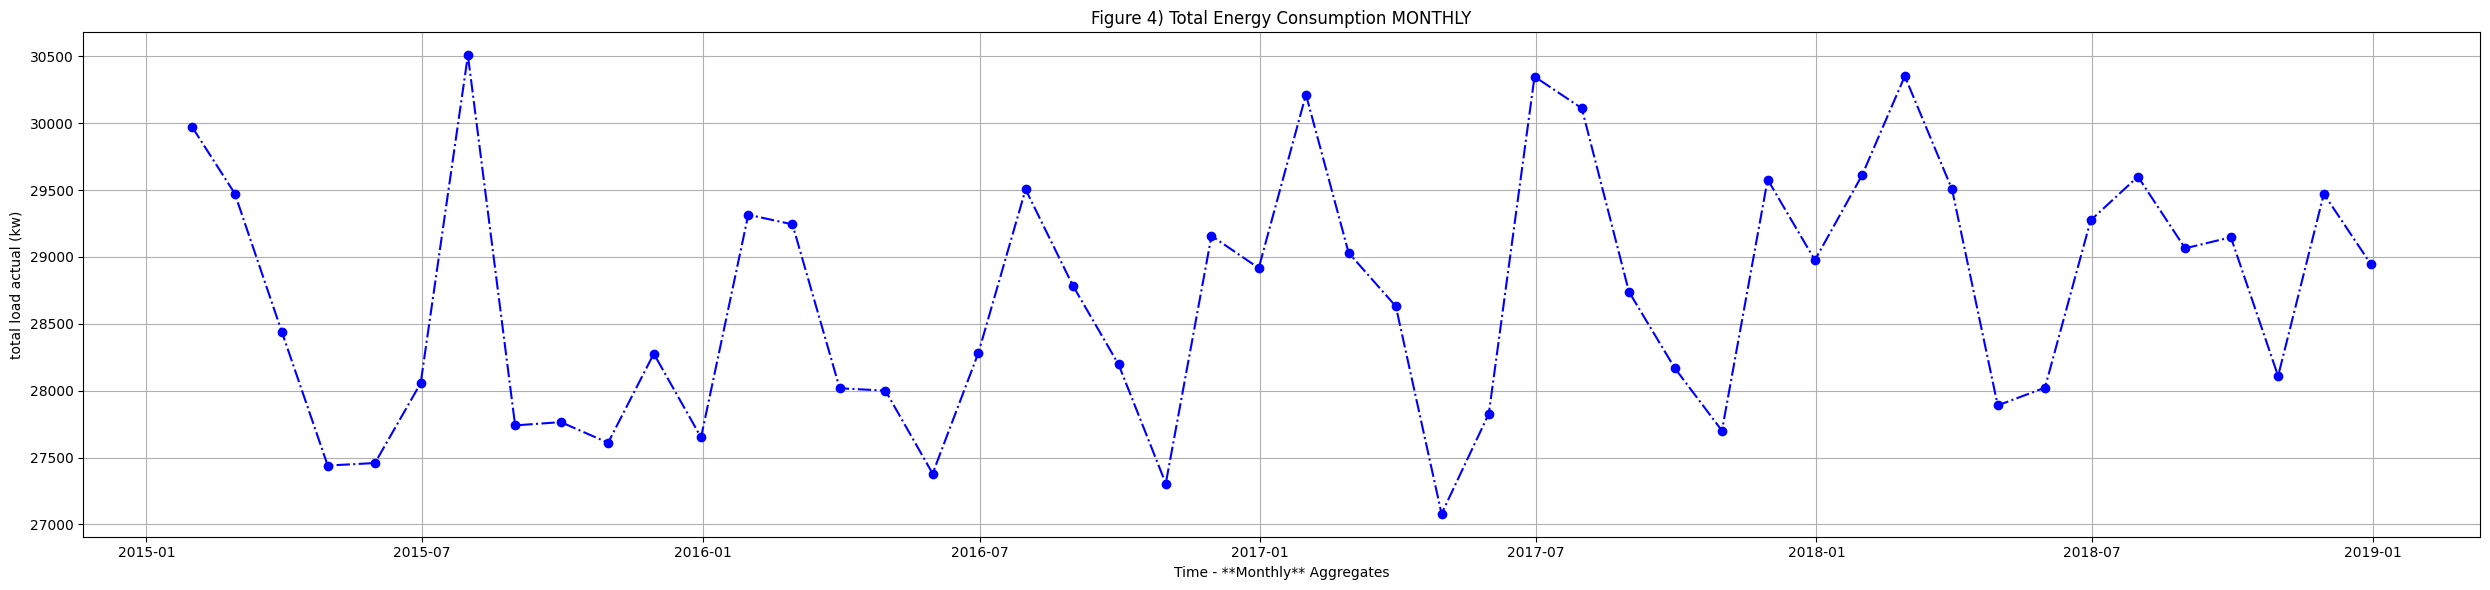

In [125]:
# Plot monthly data
plt.figure(figsize=(25, 6))
plt.plot(merged_df_monthly.index, merged_df_monthly['total load actual'], color='blue', marker='o', linestyle='-.')
plt.xlabel('Time - **Monthly** Aggregates')
plt.ylabel('total load actual (kw)')
plt.title('Figure 4) Total Energy Consumption MONTHLY')
plt.grid(True)
plt.tight_layout()
plt.show()

## Result Aggregation: Aggregate to Daily Level
Based on the visual analysis, the team decides to aggregate the data to a daily format based on the advantages named above.


We therefore reduced the overall amount of data from orginially 178161 rows to 1461 rows. (-99,2%)

**Results:** A good trade off, reducing size by 99,2% by still having daily granularity

In [126]:
merged_df.shape

(178161, 56)

In [127]:
merged_df_daily.shape

(1461, 53)

In [128]:
merged_df_daily = merged_df_daily.reset_index()

In [129]:
merged_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         1461 non-null   datetime64[ns]
 1   generation biomass                           1461 non-null   float64       
 2   generation fossil brown coal/lignite         1461 non-null   float64       
 3   generation fossil coal-derived gas           1461 non-null   float64       
 4   generation fossil gas                        1461 non-null   float64       
 5   generation fossil hard coal                  1461 non-null   float64       
 6   generation fossil oil                        1461 non-null   float64       
 7   generation fossil oil shale                  1461 non-null   float64       
 8   generation fossil peat                       1461 non-null   float64       
 9

# Sampling

The issue with sampling for the energy dataset was not neglected.
However, the found datasets published at Kaggle already represent an sample over four years.

As seen in the image below, granularity reduction was already performed using aggregation.
If you compare this sampling representation with the charts Fig 1) 2) 3), the user can observe that structural reduction already took place.

Moreover, the usual sampling techniques for weather data seemed not applicable for this approach.

Therefore, the team decided to not implement further sampling techniques

![Sampling in Book "Introduction to Data Mining showing granularity"](Book_Example_Sampling.png)

# Dimensionality Reduction
We will make a correlation matrix first to see if there are:
1. Target Variable: If there is a strong correlation between Dimension and our Target Variable (Total Load Actual)
2. See if some Columns can be dropped because of 0.0 Values (there are not empty but have no significant information - "nan" in correlation matrix
3. Check correlation between Dimensions with high correlations to our Target Variable (cross-dimensionality)

In [130]:
merged_df_daily.corr().style.background_gradient(cmap = 'YlOrRd')

In [131]:
# First of All delete all nan columns since no information about the relevance can be retrieved
merged_df_daily.drop(columns=['generation fossil coal-derived gas'], inplace=True)
merged_df_daily.drop(columns=['generation fossil oil shale'], inplace=True)
merged_df_daily.drop(columns=['generation fossil peat'], inplace=True)
merged_df_daily.drop(columns=['generation geothermal'], inplace=True)
merged_df_daily.drop(columns=['generation marine'], inplace=True)
merged_df_daily.drop(columns=['generation wind offshore'], inplace=True)

In [132]:
# Gives us a cleaner view of the Data necessary to identify correlations
merged_df_daily.corr().style.background_gradient(cmap = 'YlOrRd')

In [133]:
# Create a variable to define the Target Variable
correlation_with_target = merged_df_daily.corrwith(merged_df_daily['total load actual'])

# Create a DataFrame with correlation values
correlation_matrix = pd.DataFrame(correlation_with_target, columns=['correlation_with_target'])

# Sort the correlations
correlation_matrix_sorted = correlation_matrix.sort_values(by='correlation_with_target', ascending=False)

## Visual intermediate Result
It seems that for positve correlation:
- the input from utility companies estimating how much was produced is a good indicator for forecasting (obviously)
- It also shows a strong correlation of consumption and price
- It shows a negative correlation with hydro pump storage consumption (need to investigate)
- maany descriptions of weather phenomenas only have a very weak correlation --> however this is spain, not ireland so it might be relevant for stakeholders to consider such variables

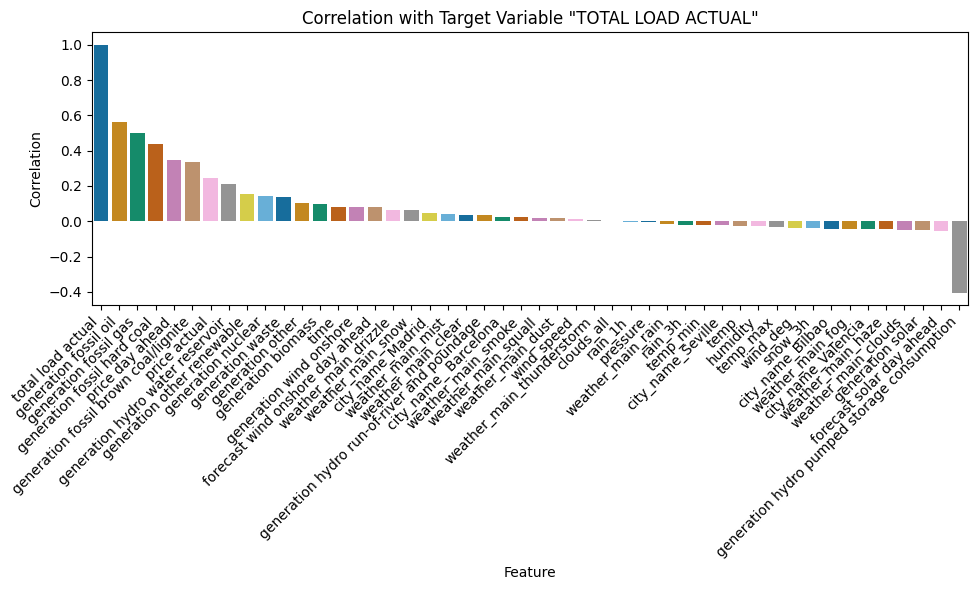

In [134]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_sorted.index, y='correlation_with_target', data=correlation_matrix_sorted, palette='colorblind')
plt.title('Correlation with Target Variable "TOTAL LOAD ACTUAL"')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [135]:
merged_df_daily.describe().T.style.background_gradient(cmap = 'YlOrRd')

# Filter Feature Selection: Using Pairwise correlation

Filter approaches Features are selected before the data mining algorithm is run, using some approach that is independent of the data mining task. For example, we might select sets of attributes whose pairwise correlation is as low as possible.

In [136]:
merged_df_daily.corr()

time  generation biomass  \
time                                         1.000000           -0.628467   
generation biomass                          -0.628467            1.000000   
generation fossil brown coal/lignite        -0.047503            0.237028   
generation fossil gas                        0.269039           -0.037635   
generation fossil hard coal                 -0.195209            0.446661   
generation fossil oil                       -0.311819            0.493554   
generation hydro pumped storage consumption -0.168316           -0.011748   
generation hydro run-of-river and poundage   0.132919           -0.300431   
generation hydro water reservoir            -0.125020           -0.069866   
generation nuclear                          -0.093163           -0.025470   
generation other                            -0.458424            0.677395   
generation other renewable                   0.821607           -0.611576   
generation solar                            -0.040308           -0.016730   
generation waste                             0.625610           -0.366915   
generation wind onshore                     -0.029322           -0.071262   
forecast solar day ahead                    -0.028723           -0.025628   
forecast wind onshore day ahead             -0.026123           -0.073405   
total load actual                            0.082247            0.096191   
price day ahead                              0.343231            0.098965   
price actual                                 0.246323            0.145267   
temp                                         0.042074            0.034086   
temp_min                                     0.072662            0.023437   
temp_max                                     0.009473            0.037672   
pressure                                    -0.062825            0.027342   
humidity                                     0.026418           -0.037002   
wind_speed                                  -0.070109           -0.049676   
wind_deg                                    -0.154784            0.058122   
rain_1h                                     -0.225445            0.074476   
rain_3h                                     -0.244467            0.169334   
snow_3h                                     -0.093037            0.036000   
clouds_all                                  -0.060808           -0.029276   
weather_main_clear                           0.029110            0.045837   
weather_main_clouds                          0.005968           -0.023876   
weather_main_drizzle                         0.146276           -0.127724   
weather_main_dust                           -0.113998            0.063274   
weather_main_fog                             0.167507           -0.109791   
weather_main_haze                           -0.089970            0.063081   
weather_main_mist                            0.233288           -0.127297   
weather_main_rain                           -0.206144            0.035463   
weather_main_smoke                          -0.009596            0.046097   
weather_main_snow                            0.046949           -0.041558   
weather_main_squall                          0.033261           -0.004920   
weather_main_thunderstorm                    0.193640           -0.089683   
city_name_ Barcelona                        -0.074528            0.066706   
city_name_Bilbao                            -0.006738           -0.002504   
city_name_Madrid                             0.174028           -0.144718   
city_name_Seville                           -0.076470            0.083322   
city_name_Valencia                          -0.236467            0.179937   

                                             generation fossil brown coal/lignite  \
time                                                                    -0.047503   
generation biomass                                                       0.237028   
generation fossil br

In [137]:
merged_df_daily

time  generation biomass  generation fossil brown coal/lignite  \
0    2015-01-01          428.500000                            257.416667   
1    2015-01-02          385.291667                              0.000000   
2    2015-01-03          440.500000                              0.000000   
3    2015-01-04          397.125000                              0.000000   
4    2015-01-05          360.764706                             25.294118   
...         ...                 ...                                   ...   
1456 2018-12-27          303.918699                            696.943089   
1457 2018-12-28          316.398374                            657.739837   
1458 2018-12-29          289.625000                              4.708333   
1459 2018-12-30          275.370968                              0.000000   
1460 2018-12-31          296.008264                              0.000000   

      generation fossil gas  generation fossil hard coal  \
0               4256.750000                  4246.541667   
1               3540.666667                  1237.000000   
2               3444.291667                  1344.250000   
3               3469.583333                  2244.958333   
4               4603.294118                  2640.000000   
...                     ...                          ...   
1456            9655.845528                  2894.642276   
1457            8112.398374                  2781.918699   
1458            4981.833333                  1733.833333   
1459            5273.419355                  1531.129032   
1460            6259.826446                  2199.595041   

      generation fossil oil  generation hydro pumped storage consumption  \
0                160.208333                                  1070.416667   
1                198.625000                                  1543.666667   
2                226.583333                                  1338.458333   
3                355.416667                                   590.000000   
4                322.470588                                  1161.588235   
...                     ...                                          ...   
1456             296.926829                                   149.861789   
1457             274.471545                                    79.048780   
1458             255.166667                                   602.250000   
1459             223.919355                                   602.258065   
1460             199.876033                                   200.256198   

      generation hydro run-of-river and poundage  \
0                                    1047.875000   
1                                    1293.541667   
2                                    1374.750000   
3                                    1495.250000   
4                                    1165.529412   
...                                          ...   
1456                                 1185.723577   
1457                                 1152.349593   
1458                                 1120.375000   
1459                                 1065.153226   
1460                                 1062.677686   

      generation hydro water reservoir  generation nuclear  ...  \
0                          2166.875000         7097.000000  ...   
1                          3714.958333         7105.833333  ...   
2                          3969.416667         7095.375000  ...   
3                          3241.333333         7083.625000  ...   
4                          2541.529412         3932.176471  ...   
...                                ...                 ...  ...   
1456                       3736.699187         6065.951220  ...   
1457                       2572.390244         6072.552846  ...   
1458                       1823.875000         6072.375000  ...   
1459                       1934.491935         6071.346774  ...   
1460                       2121.512397         6072.272727  ...   

      weather_main_rai

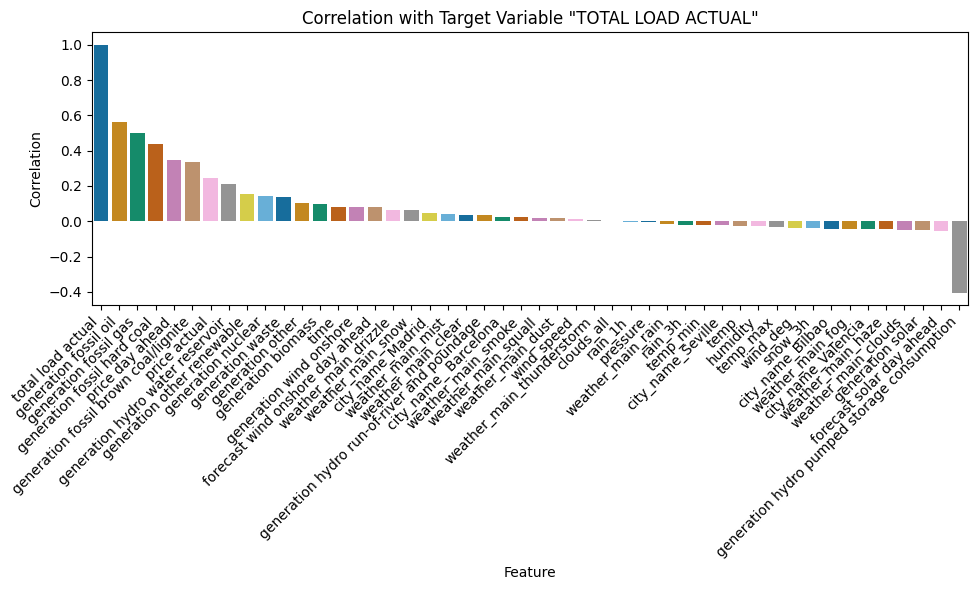

In [138]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_sorted.index, y='correlation_with_target', data=correlation_matrix_sorted, palette='colorblind')
plt.title('Correlation with Target Variable "TOTAL LOAD ACTUAL"')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What we want to do, is to cross-check each positive correlated feature with high correlation to the target variable

Cross-checking is done with pairwise correlation

### Checking Positively Correlated Variables

<Axes: xlabel='generation fossil oil', ylabel='generation fossil gas'>

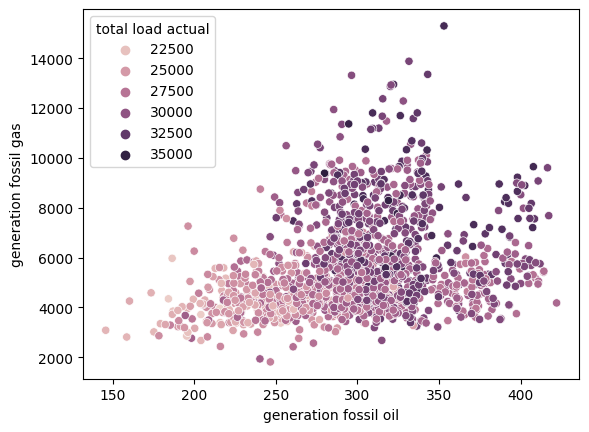

In [139]:
# Generation Fossil Oil vs Generation Fossil Gas
sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil oil'], y = 'generation fossil gas', hue='total load actual')





<Axes: xlabel='generation fossil gas', ylabel='generation fossil hard coal'>

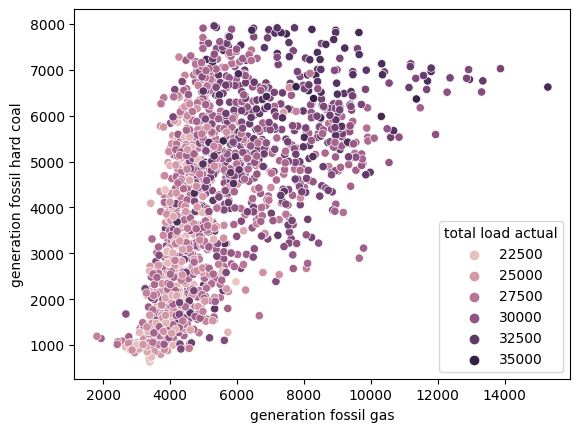

In [140]:

sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil gas'], y = 'generation fossil hard coal', hue='total load actual')







<Axes: xlabel='generation fossil gas', ylabel='generation fossil hard coal'>

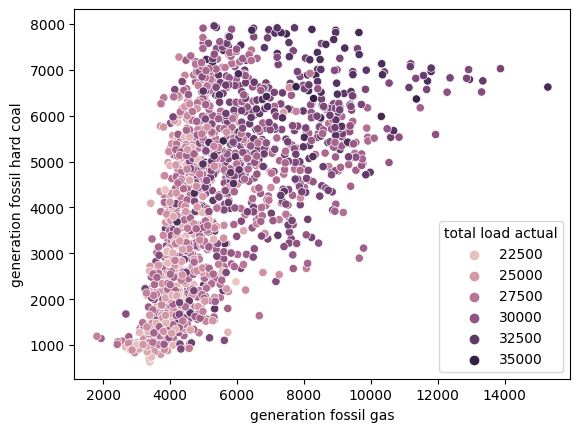

In [141]:

sns.scatterplot(data = merged_df_daily, x = merged_df_daily['generation fossil gas'], y = 'generation fossil hard coal', hue='total load actual')







Here I am implementing a linear regression load forecasting model based on a given split date 

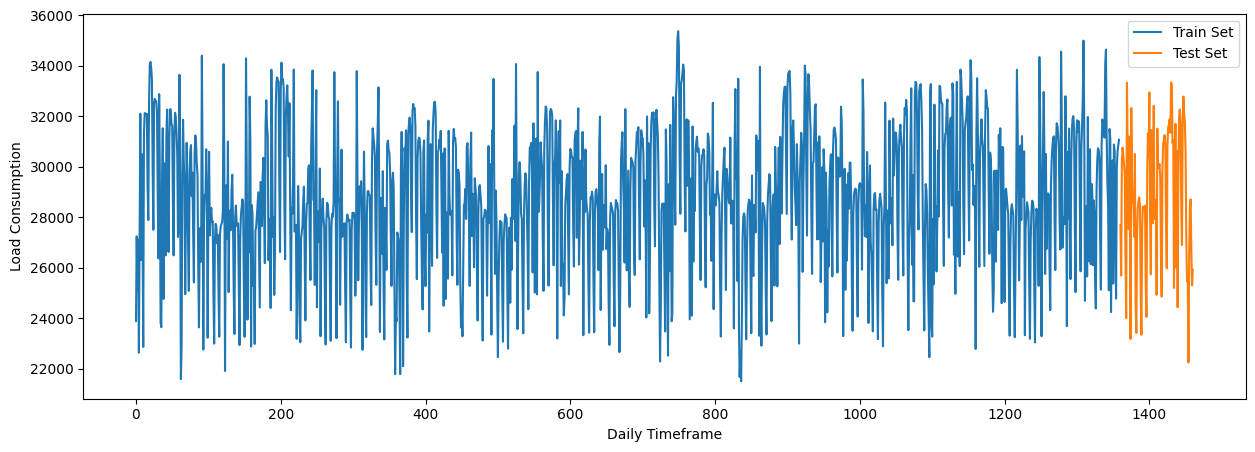

In [142]:
split_date = "2018-09-21"
train = merged_df_daily.loc[merged_df_daily["time"]<split_date]
test = merged_df_daily.loc[merged_df_daily["time"]>split_date]
train_set = train["total load actual"]
test_set = test["total load actual"]
fig,ax=plt.subplots(figsize=(15,5))
plt.xlabel("Daily Timeframe")
plt.ylabel("Load Consumption")
train_set.plot(ax=ax,label="Train Set")
test_set.plot(ax=ax,label="Test Set")
plt.legend()
plt.show()


In [143]:
train_df = pd.DataFrame(train, columns=merged_df_daily.columns)
test_df = pd.DataFrame(test, columns=merged_df_daily.columns)
X_train_numeric = train_df.select_dtypes(include=['float64', 'int64'])
X_test_numeric = test_df.select_dtypes(include=['float64', 'int64'])
X_train = X_train_numeric.drop(["total load actual"], axis=1) 
X_test = X_test_numeric.drop(["total load actual"], axis=1)
y_train = train_df["total load actual"]
y_test = test_df["total load actual"]

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca = PCA(n_components=0.98)  # Retain 98% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict
y_test_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)

# Evaluate
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train_pred,y_train)
MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)

print("Mean Squared error (Train)",mse_train)
print("Mean Squared Error (Test):", mse_test)
print("MAPE Test Error:",MAPE_test)


Mean Squared error (Train) 1151205.5779493237
Mean Squared Error (Test): 1838260.3564081602
MAPE Test Error: 0.038498755850111345


The Model has an extremely high MSE value which should be amended if possible

## Embedded Feature Selection PCA: Principal Component Analysis (PCA)
Having already seen visually which features might be important, we will let an algorithm decide which featues our final dataframe should include

Principal Component ANalysis hereby is a suitable algorithm for continous attributes (time related).

PCA figures out the most important features impacting the target variable and calls them Principal Components (PC)
The most important features caputre the highest level of variation in the data. For PCA the mean is removed.


PCA has multiple advantages since:
- it can reduce high dimensionality extremly well
- tends to find the strongest patterns
- usually reduces noise in the data which is beneficial for upcoming algorithms (expands the possibility applying more algorithms)


**Sometimes it is still beneficial to apply Singular Value Decomposition SVD to get a different view**

SVD - in contrast to PCA - keeps the mean and therefore migth end up giving different results



**In order to Make PCA Work, we need to scale the information in our dataframe**

Scaled the Merged Dataframe for Feature Analysis

In [145]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
mergedDF = merged_df_daily.copy()
mergedDF = mergedDF.select_dtypes(include=['float64', 'int64'])
mergedDFscaled = scalar.fit_transform(mergedDF)
scaled_df = pd.DataFrame(mergedDFscaled, columns=mergedDF.columns, index=mergedDF.index)
X = scaled_df.drop('total load actual', axis = 1)  # just want features
y = scaled_df['total load actual']   # target

Run PCA analysis and Linear Regression on the model

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Apply PCA
pca = PCA(n_components=0.98)  # Retain 98% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict
y_test_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)


In [147]:
# Define a function to calculate forecasting accuracy based on a threshold
def forecasting_accuracy(y_true, y_test_pred, threshold):
    accurate_forecasts = sum(abs(np.array(y_test_pred) - np.array(y_true)) / np.array(y_true) <= threshold)
    total_forecasts = len(y_true)
    accuracy = (accurate_forecasts / total_forecasts) * 100
    return accuracy

# Define a threshold for accuracy
threshold = 0.1  # Define a threshold for considering a forecast accurate (e.g., within 10%)

In [148]:
# Evaluating Training Set
mae_train = mean_absolute_error(y_train_pred, y_train)
mse_train = mean_squared_error(y_train_pred,y_train)
mape_train = mean_absolute_percentage_error(y_train_pred, y_train)
r2_train = r2_score(y_train, y_train_pred)
accuracy_train = forecasting_accuracy(y_train, y_train_pred, threshold)


# Evaluate Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
accuracy_test = forecasting_accuracy(y_test, y_test_pred, threshold)

In [149]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Train): \t  ",mae_test)
print("R2 Score (Train): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")


Results: Training Set
Mean Squared Error (Train): 	   0.14982875952084315
Mean Absolute Error (Train): 	   0.3078299391553138
R2 Score (Train): 	 	   0.8492750453430115
MAPE (Train): 			   3.030184789028666
Forecasting Accuracy (Train): 	   59.24657534246576 %


Results: Test Set
Mean Squared Error (Test): 	   0.16194438829066363
Mean Absolute Error (Train): 	   0.32157879616260604
R2 Score (Train): 	 	   0.8416436700372094
MAPE Test Error: 		   1.3491023298416673
Forecasting Accuracy (Test): 	   50.51194539249146 %


In [150]:
from sklearn.ensemble import RandomForestRegressor
ranFor_model = RandomForestRegressor(n_estimators=100,max_depth=5)
ranFor_model.fit(X_train_pca,y_train)
ypred = ranFor_model.predict(X_test_pca)
ytrainPred = ranFor_model.predict(X_train_pca)

In [151]:
# Evaluating Training Set
mae_train = mean_absolute_error(ytrainPred, y_train)
mse_train = mean_squared_error(ytrainPred,y_train)
mape_train = mean_absolute_percentage_error(ytrainPred, y_train)
r2_train = r2_score(y_train, ytrainPred)
accuracy_train = forecasting_accuracy(y_train, ytrainPred, threshold)


# Evaluate Test Set
mse_test = mean_squared_error(y_test, ypred)
mae_test = mean_absolute_error(y_test, ypred)
mape_test = mean_absolute_percentage_error(y_test, ypred)
r2_test = r2_score(y_test, ypred)
accuracy_test = forecasting_accuracy(y_test, ypred, threshold)

In [152]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Train): \t  ",mae_test)
print("R2 Score (Train): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")


Results: Training Set
Mean Squared Error (Train): 	   0.28710168699336525
Mean Absolute Error (Train): 	   0.43228884522134947
R2 Score (Train): 	 	   0.711181024975382
MAPE (Train): 			   10.696358913004708
Forecasting Accuracy (Train): 	   54.36643835616438 %


Results: Test Set
Mean Squared Error (Test): 	   0.4439513383086048
Mean Absolute Error (Train): 	   0.5148937157022877
R2 Score (Train): 	 	   0.5658848981513431
MAPE Test Error: 		   1.5655955901159022
Forecasting Accuracy (Test): 	   46.41638225255973 %


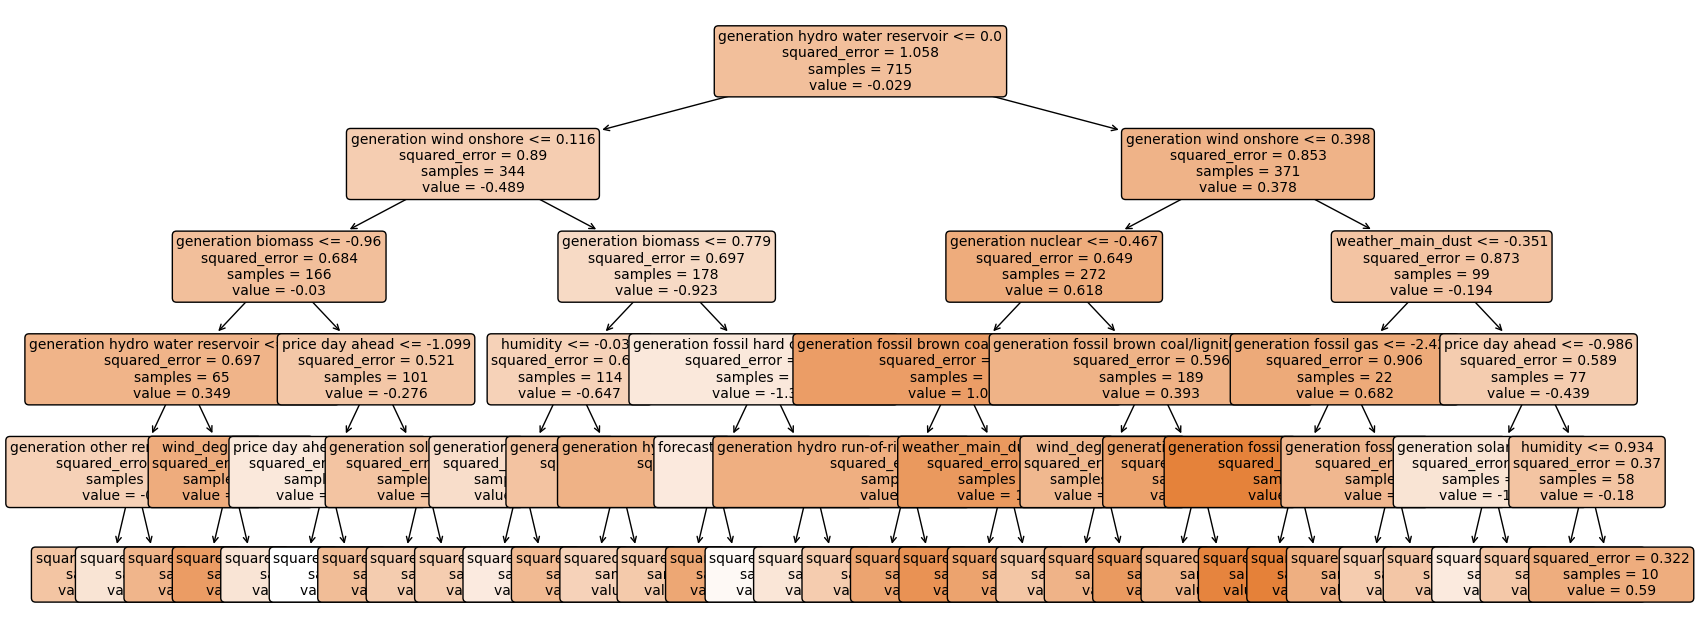

In [153]:
from sklearn.tree import plot_tree
tree= ranFor_model.estimators_[0]
plt.figure(figsize=(20,8))
plot_tree(tree,feature_names=X_train.columns.tolist(),filled=True,rounded=True,fontsize=10,class_names=["low","medium","high"])
plt.show()

In [154]:
X_test=X_test.reset_index()
X_train=X_train.reset_index()

Concatenating predicted results with the standardised DF to graph actual vs predicted results

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Concatenating predictions for x_train and x_test
full_pred = np.concatenate([y_train_pred, y_test_pred])
full_pred  = full_pred.astype(float)
scaled_df["test predictions"] = full_pred 

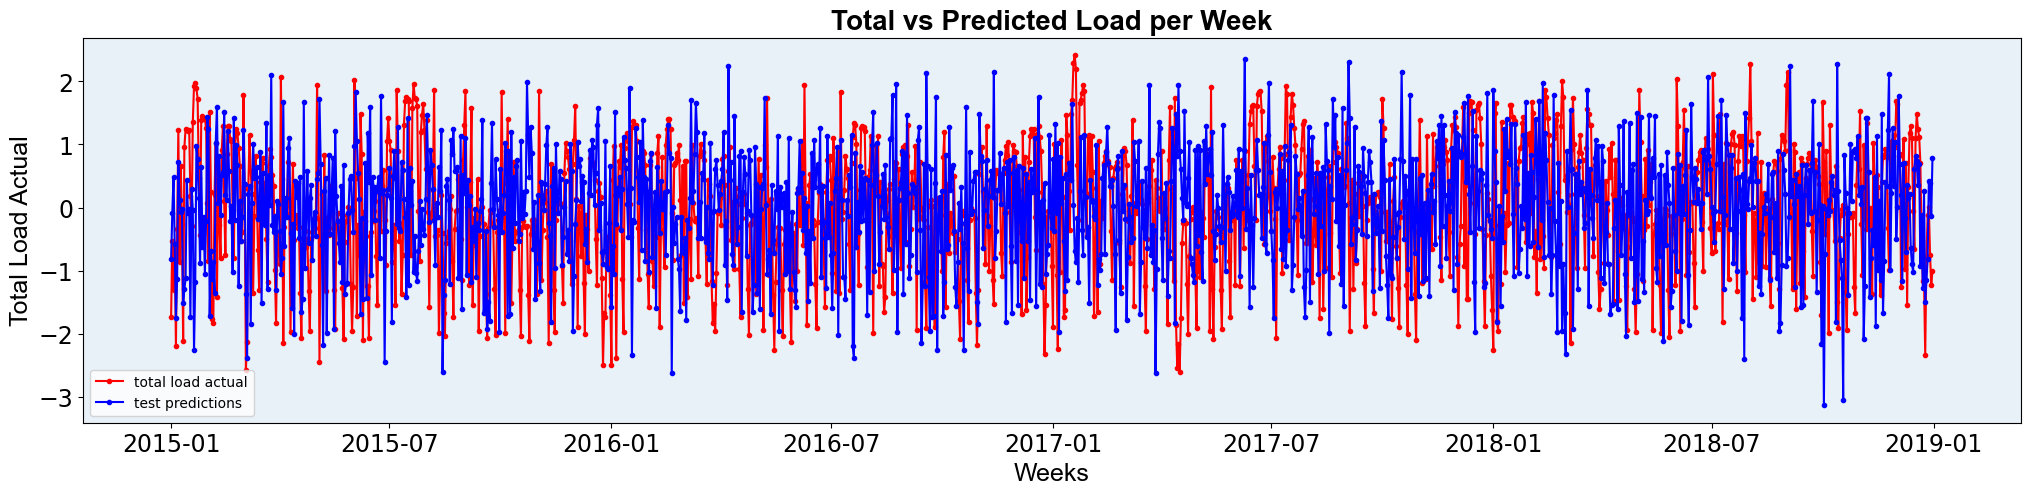

In [156]:
plt.figure(figsize=(25,5))
plt.title("Total vs Predicted Load per Week",fontsize=20,fontfamily="Arial",fontweight="bold")
plt.xlabel("Weeks",fontsize=18,fontfamily="Arial")
plt.ylabel("Total Load Actual",fontsize=18,fontfamily="Arial")
plt.plot(merged_df_daily["time"],scaled_df["total load actual"],color="red",marker=".",label="total load actual")
plt.plot(merged_df_daily["time"],scaled_df["test predictions"],color="blue",marker=".",label="test predictions")
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gca().set_facecolor('#e8f0f8')
plt.show()

Plotting line of best fit 

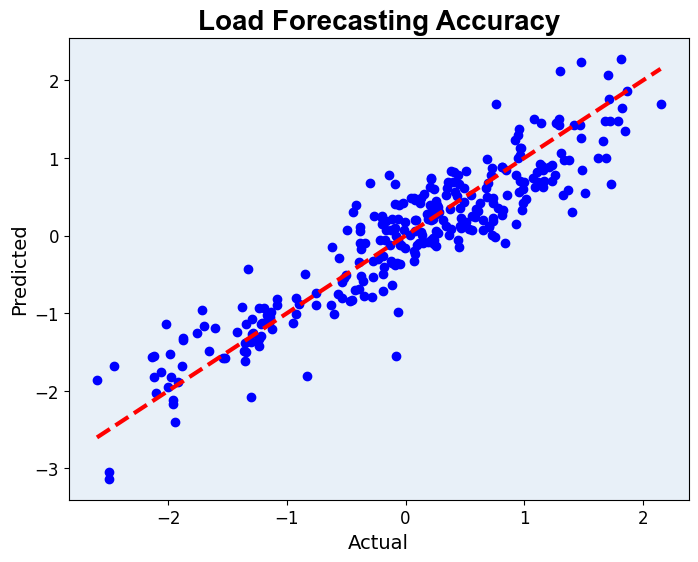

In [157]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--',linewidth=3) 
plt.ylabel('Predicted',fontsize=14)
plt.xlabel("Actual",fontsize=14)
plt.title('Load Forecasting Accuracy',fontsize=20,fontfamily="Arial",fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('#e8f0f8')
plt.show()

XG Boost implementation

In [158]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=True)



[0]	validation_0-rmse:0.98951	validation_1-rmse:1.00552
[1]	validation_0-rmse:0.98208	validation_1-rmse:0.99922
[2]	validation_0-rmse:0.97483	validation_1-rmse:0.99284
[3]	validation_0-rmse:0.96753	validation_1-rmse:0.98665
[4]	validation_0-rmse:0.96023	validation_1-rmse:0.98026
[5]	validation_0-rmse:0.95321	validation_1-rmse:0.97416
[6]	validation_0-rmse:0.94628	validation_1-rmse:0.96814
[7]	validation_0-rmse:0.93941	validation_1-rmse:0.96221
[8]	validation_0-rmse:0.93257	validation_1-rmse:0.95642
[9]	validation_0-rmse:0.92571	validation_1-rmse:0.95076
[10]	validation_0-rmse:0.91907	validation_1-rmse:0.94497
[11]	validation_0-rmse:0.91233	validation_1-rmse:0.93945
[12]	validation_0-rmse:0.90582	validation_1-rmse:0.93391
[13]	validation_0-rmse:0.89927	validation_1-rmse:0.92851
[14]	validation_0-rmse:0.89291	validation_1-rmse:0.92293
[15]	validation_0-rmse:0.88657	validation_1-rmse:0.91779
[16]	validation_0-rmse:0.88038	validation_1-rmse:0.91247
[17]	validation_0-rmse:0.87406	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [159]:
Y_pred = model.predict(X_test_scaled)
YtrainPred = model.predict(X_train_scaled)
XGB_pred = np.concatenate([YtrainPred, Y_pred])
XGB_pred  = XGB_pred.astype(float)
scaled_df["XGB predictions"] = XGB_pred 

# Evaluating Training Set
mae_train = mean_absolute_error(YtrainPred, y_train)
mse_train = mean_squared_error(YtrainPred,y_train)
mape_train = mean_absolute_percentage_error(YtrainPred, y_train)
r2_train = r2_score(YtrainPred, y_train)
accuracy_train = forecasting_accuracy(y_train, YtrainPred, threshold)


# Evaluate Test Set
mse_test = mean_squared_error(y_test, Y_pred)
mae_test = mean_absolute_error(y_test, Y_pred)
mape_test = mean_absolute_percentage_error(y_test, Y_pred)
r2_test = r2_score(y_test, Y_pred)
accuracy_test = forecasting_accuracy(y_test, Y_pred, threshold)

In [160]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Train): \t  ",mae_test)
print("R2 Score (Train): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")


Results: Training Set
Mean Squared Error (Train): 	   0.008439183596046586
Mean Absolute Error (Train): 	   0.06690172907687057
R2 Score (Train): 	 	   0.9909746046511344
MAPE (Train): 			   0.486751022264021
Forecasting Accuracy (Train): 	   82.61986301369863 %


Results: Test Set
Mean Squared Error (Test): 	   0.12921375700394366
Mean Absolute Error (Train): 	   0.2661497829585951
R2 Score (Train): 	 	   0.8736491177260015
MAPE Test Error: 		   0.8208716995982602
Forecasting Accuracy (Test): 	   53.58361774744027 %


Graphing Actual vs Predicted Results

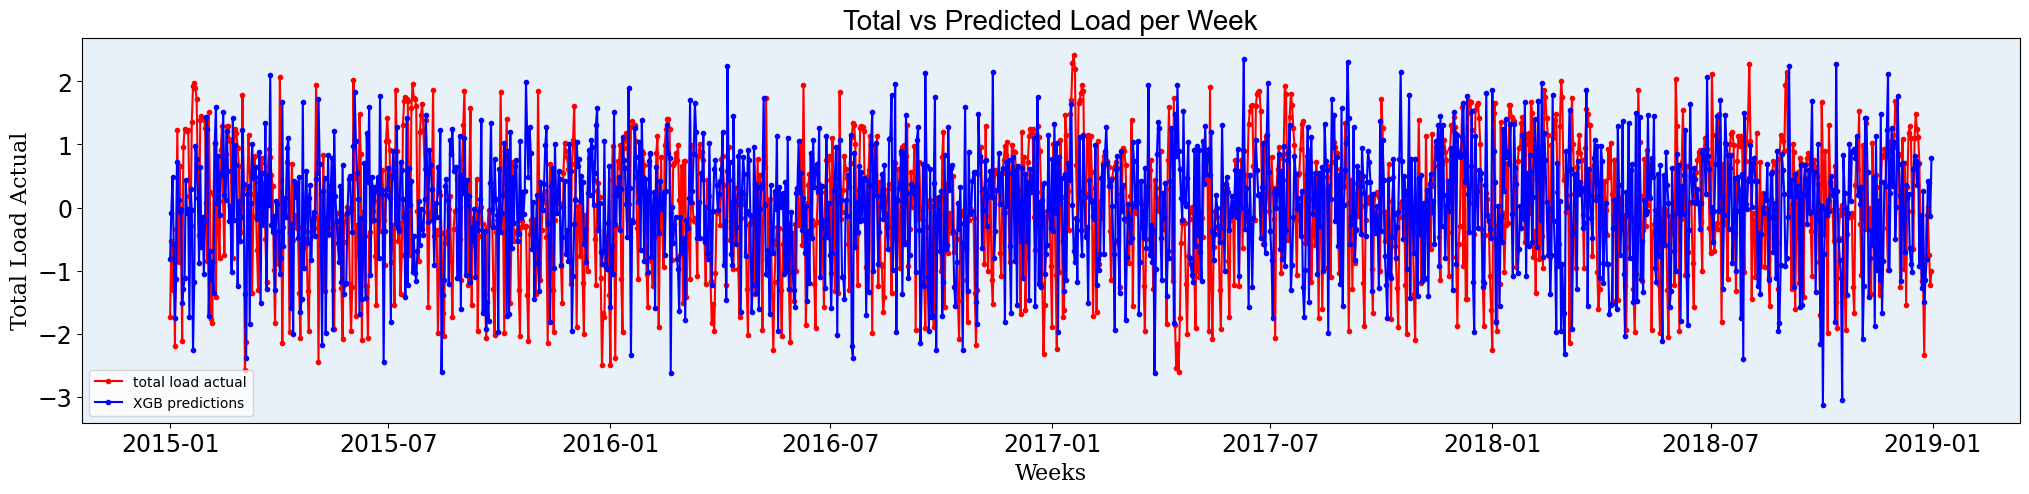

In [161]:
plt.figure(figsize=(25,5))
plt.title("Total vs Predicted Load per Week",fontsize=20,fontfamily="Arial")
plt.xlabel("Weeks",fontsize=16,fontfamily="serif")
plt.ylabel("Total Load Actual",fontsize=16,fontfamily="serif")
plt.plot(merged_df_daily["time"],scaled_df["total load actual"],color="red",marker=".",label="total load actual")
plt.plot(merged_df_daily["time"],scaled_df["test predictions"],color="blue",marker=".",label="XGB predictions")
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gca().set_facecolor('#e8f0f8')
plt.show()

Additional analysis below using Lasso Regression for preventing overfitting

In [162]:
from sklearn.linear_model import LassoCV

#Lasso Regression with K-Fold Cross Validation
lasso_model = LassoCV(cv=5)  #implementing 5 fold cross-validation
lasso_model.fit(X_train_pca, y_train)

    # Predict
ypred_lasso= lasso_model.predict(X_test_pca)
y_train_lasso = lasso_model.predict(X_train_pca)

    # Evaluate
mse_lasso_test = mean_squared_error(y_test, ypred_lasso)
mse_lasso_train = mean_squared_error(y_train, y_train_lasso)
MAPE_test_lasso = mean_absolute_percentage_error(y_test, ypred_lasso)

# Evaluating Training Set
mae_train = mean_absolute_error(y_train_lasso, y_train)
mse_train = mean_squared_error(y_train_lasso,y_train)
mape_train = mean_absolute_percentage_error(y_train_lasso, y_train)
r2_train = r2_score(y_train, y_train_lasso)
accuracy_train = forecasting_accuracy(y_train, y_train_lasso, threshold)


# Evaluate Test Set
mse_test = mean_squared_error(y_test, ypred_lasso)
mae_test = mean_absolute_error(y_test, ypred_lasso)
mape_test = mean_absolute_percentage_error(y_test, ypred_lasso)
r2_test = r2_score(y_test, ypred_lasso)
accuracy_test = forecasting_accuracy(y_test, ypred_lasso, threshold)

In [163]:
# Training Results
print("Results: Training Set")
print("Mean Squared Error (Train): \t  ",mse_train)
print("Mean Absolute Error (Train): \t  ",mae_train)
print("R2 Score (Train): \t \t  ",r2_train)
print("MAPE (Train): \t\t\t  ",mape_train)
print("Forecasting Accuracy (Train): \t  ", accuracy_train, "%")


# Testing Results
print("\n")
print("Results: Test Set")
print("Mean Squared Error (Test): \t  ", mse_test)
print("Mean Absolute Error (Train): \t  ",mae_test)
print("R2 Score (Train): \t \t  ",r2_test)
print("MAPE Test Error: \t\t  ",mape_test)
print("Forecasting Accuracy (Test): \t  ", accuracy_test, "%")


Results: Training Set
Mean Squared Error (Train): 	   0.15099822497441726
Mean Absolute Error (Train): 	   0.3086567214560869
R2 Score (Train): 	 	   0.8480985847754503
MAPE (Train): 			   4.425520487428242
Forecasting Accuracy (Train): 	   59.07534246575342 %


Results: Test Set
Mean Squared Error (Test): 	   0.15985433532463872
Mean Absolute Error (Train): 	   0.3193102128815553
R2 Score (Train): 	 	   0.8436874155514628
MAPE Test Error: 		   1.3476127119815653
Forecasting Accuracy (Test): 	   49.829351535836174 %


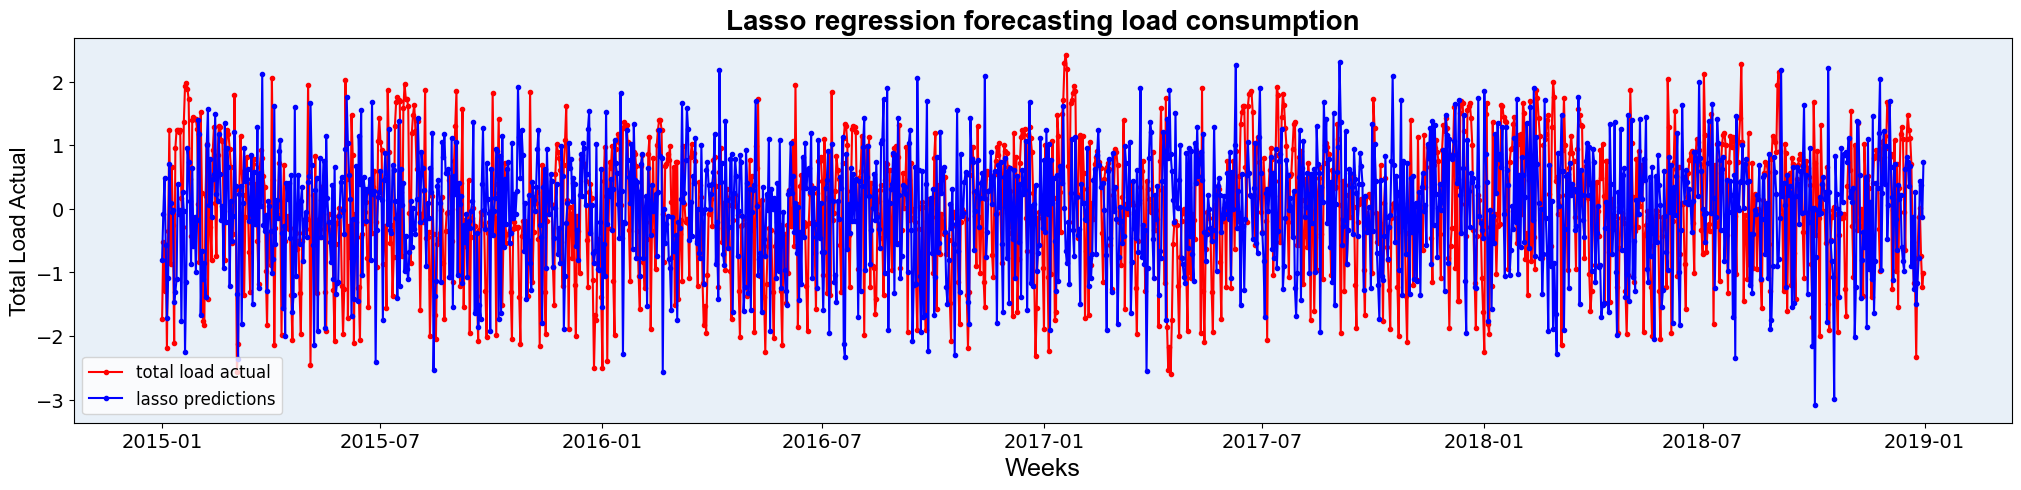

In [164]:
#concatenating predictions for train and test set into one numpy array
lasso_pred = np.concatenate([y_train_lasso, ypred_lasso])
lasso_pred = lasso_pred.astype(float)

#Plotting Lasso Predictions of total load factor against the actual results
scaled_df["test predictions (Lasso)"] = lasso_pred
plt.figure(figsize=(25,5))
plt.title("Lasso regression forecasting load consumption",fontsize=20,fontweight="bold",fontfamily="Arial")
plt.xlabel("Weeks",fontsize=18,fontfamily="Arial")
plt.ylabel("Total Load Actual",fontsize=16,fontfamily="Arial")
plt.plot(merged_df_daily["time"],scaled_df["total load actual"],color="red",marker=".",label="total load actual")
plt.plot(merged_df_daily["time"],scaled_df["test predictions (Lasso)"],color="blue",marker=".",label="lasso predictions")
plt.legend(loc="lower left",fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.gca().set_facecolor('#e8f0f8')
plt.show()

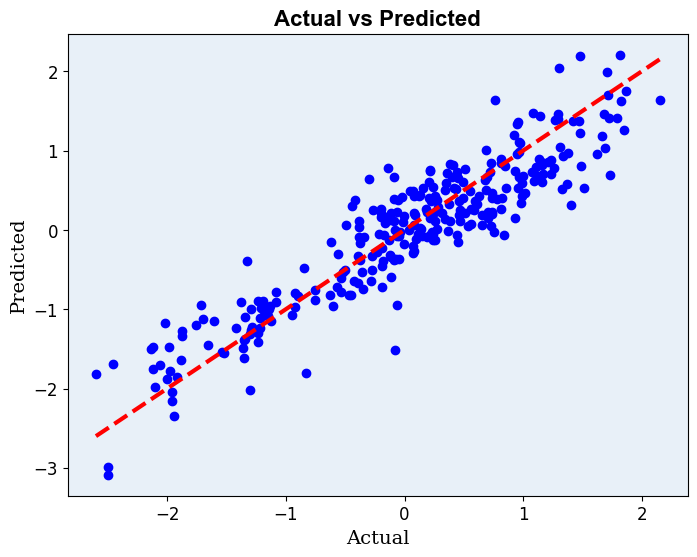

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred_lasso, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--',linewidth=3) 
plt.ylabel('Predicted',fontsize=14,fontfamily="serif")
plt.xlabel("Actual",fontsize=14,fontfamily="serif")
plt.title('Actual vs Predicted',fontsize=16,fontweight="bold",fontfamily="Arial")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().set_facecolor('#e8f0f8')
plt.show()

In [166]:
merged_df_daily["time"]

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
1456   2018-12-27
1457   2018-12-28
1458   2018-12-29
1459   2018-12-30
1460   2018-12-31
Name: time, Length: 1461, dtype: datetime64[ns]

In [167]:
merged_df_daily

time  generation biomass  generation fossil brown coal/lignite  \
0    2015-01-01          428.500000                            257.416667   
1    2015-01-02          385.291667                              0.000000   
2    2015-01-03          440.500000                              0.000000   
3    2015-01-04          397.125000                              0.000000   
4    2015-01-05          360.764706                             25.294118   
...         ...                 ...                                   ...   
1456 2018-12-27          303.918699                            696.943089   
1457 2018-12-28          316.398374                            657.739837   
1458 2018-12-29          289.625000                              4.708333   
1459 2018-12-30          275.370968                              0.000000   
1460 2018-12-31          296.008264                              0.000000   

      generation fossil gas  generation fossil hard coal  \
0               4256.750000                  4246.541667   
1               3540.666667                  1237.000000   
2               3444.291667                  1344.250000   
3               3469.583333                  2244.958333   
4               4603.294118                  2640.000000   
...                     ...                          ...   
1456            9655.845528                  2894.642276   
1457            8112.398374                  2781.918699   
1458            4981.833333                  1733.833333   
1459            5273.419355                  1531.129032   
1460            6259.826446                  2199.595041   

      generation fossil oil  generation hydro pumped storage consumption  \
0                160.208333                                  1070.416667   
1                198.625000                                  1543.666667   
2                226.583333                                  1338.458333   
3                355.416667                                   590.000000   
4                322.470588                                  1161.588235   
...                     ...                                          ...   
1456             296.926829                                   149.861789   
1457             274.471545                                    79.048780   
1458             255.166667                                   602.250000   
1459             223.919355                                   602.258065   
1460             199.876033                                   200.256198   

      generation hydro run-of-river and poundage  \
0                                    1047.875000   
1                                    1293.541667   
2                                    1374.750000   
3                                    1495.250000   
4                                    1165.529412   
...                                          ...   
1456                                 1185.723577   
1457                                 1152.349593   
1458                                 1120.375000   
1459                                 1065.153226   
1460                                 1062.677686   

      generation hydro water reservoir  generation nuclear  ...  \
0                          2166.875000         7097.000000  ...   
1                          3714.958333         7105.833333  ...   
2                          3969.416667         7095.375000  ...   
3                          3241.333333         7083.625000  ...   
4                          2541.529412         3932.176471  ...   
...                                ...                 ...  ...   
1456                       3736.699187         6065.951220  ...   
1457                       2572.390244         6072.552846  ...   
1458                       1823.875000         6072.375000  ...   
1459                       1934.491935         6071.346774  ...   
1460                       2121.512397         6072.272727  ...   

      weather_main_rai

## End Script 1 - Data Pre-Cleaning
The CSV file Energy_Data_Processed.csv can be used for the actual Data Mining Tasks in Script 2.

In [168]:
merged_df.to_csv('Energy_Data_Processed.csv', index=False)

In [169]:
merged_df_daily.to_csv('Energy_Data_Processed_Daily.csv', index=False)